In [1]:
cd


C:\Users\Proxy1


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Proxy1\Downloads\archive\GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


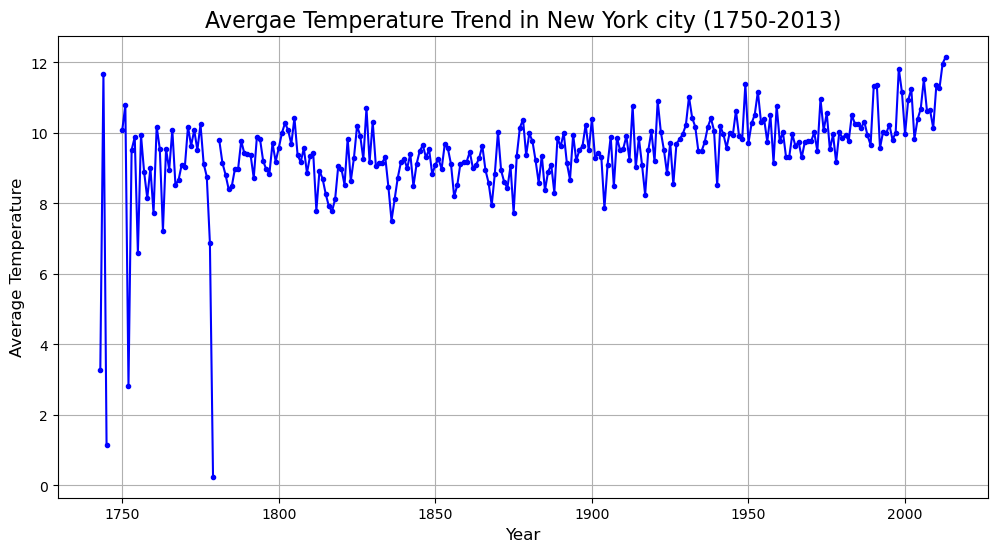

In [33]:
city_data=df[df['City']=='New York'].copy()
city_data['dt']=pd.to_datetime(city_data['dt'],errors='coerce')
city_data['Year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],linestyle='-',color='blue',marker='.')
plt.title('Avergae Temperature Trend in New York city (1750-2013)',fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Temperature', fontsize=12)
plt.grid(True)
plt.show()                

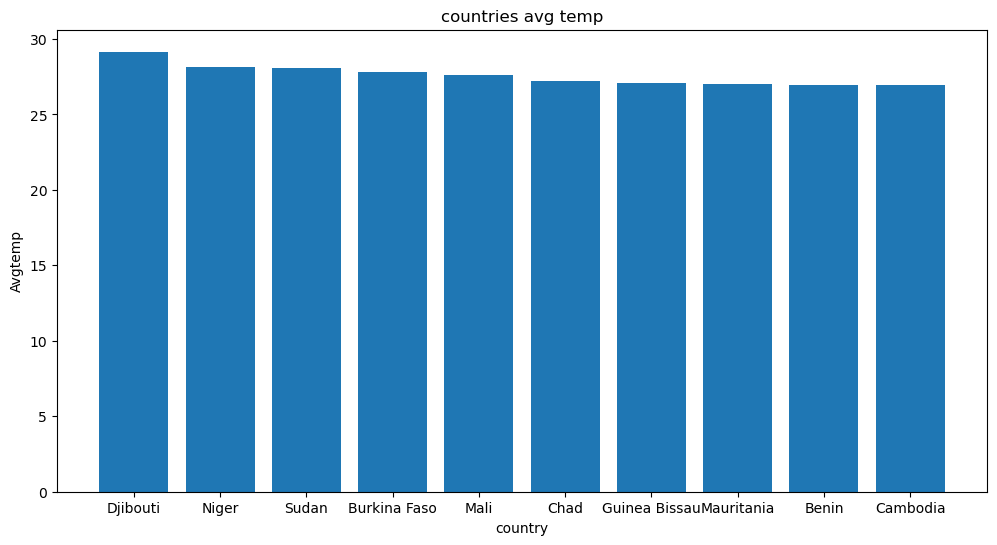

In [63]:
#BAR PLOT

country_avg_temp=df.groupby('Country')['AverageTemperature'].mean()
country_avg_temp_sort=country_avg_temp.sort_values(ascending=False)
top_10=country_avg_temp_sort.head(10)
plt.figure(figsize=(12,6))
plt.bar(x=top_10.index, height=top_10.values)
plt.title("countries avg temp")
plt.xlabel("country")
plt.ylabel("Avgtemp")
plt.show()

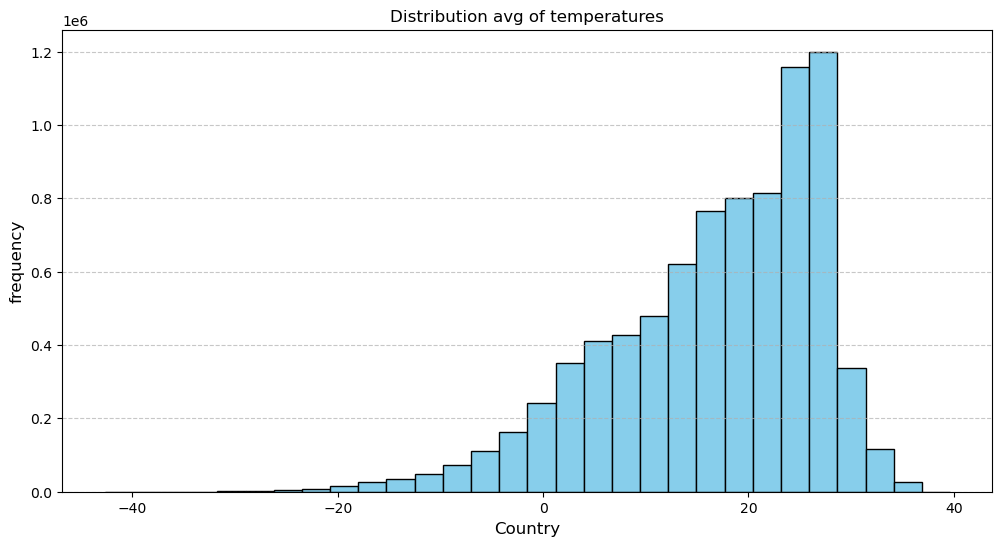

In [77]:
# HISTOGRAM
temp_data=df['AverageTemperature'].dropna()
plt.figure(figsize=(12,6))
plt.hist(temp_data,bins=30,color='skyblue',edgecolor='black')
plt.title("Distribution avg of temperatures")
plt.xlabel("Country",fontsize=12)
plt.ylabel("frequency",fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

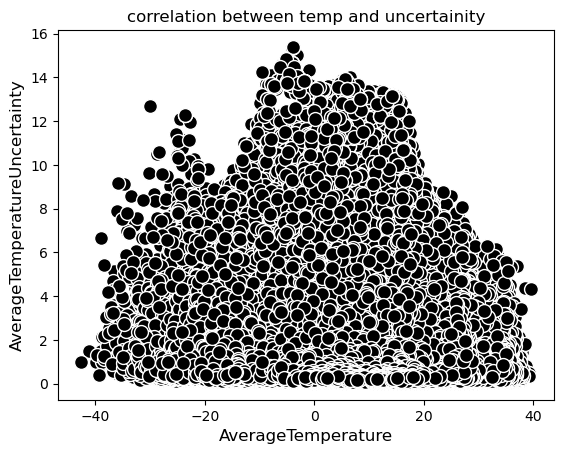

In [93]:
# SCATTER PLOT
temp_data1=df['AverageTemperature'].dropna()
temp_data2=df['AverageTemperatureUncertainty'].dropna()
plt.scatter(temp_data1,temp_data2,color='black',s=100,edgecolor='white')
plt.title("correlation between temp and uncertainity")
plt.xlabel("AverageTemperature",fontsize=12)
plt.ylabel("AverageTemperatureUncertainty",fontsize=12)
plt.show()

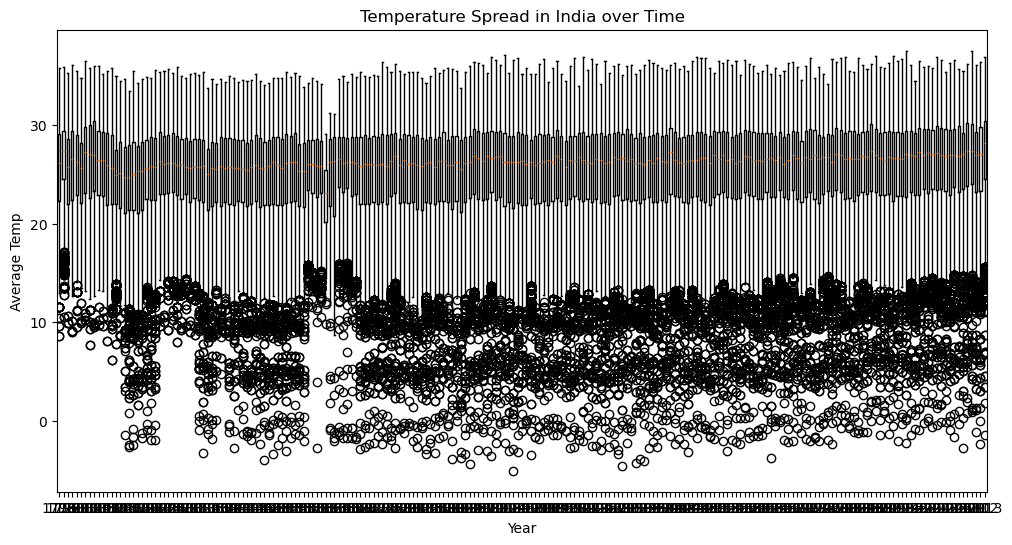

In [107]:
#BOX PLOT
country=df[df['Country']=='India'].copy()
country['dt']=pd.to_datetime(country['dt'],errors='coerce')
country=country.dropna(subset=['dt'])
country['Year']=country['dt'].dt.year
country=country[['Year','AverageTemperature']].dropna()
grouped_data=[group['AverageTemperature'] for _,group in country.groupby('Year')]
plt.figure(figsize=(12,6))
plt.boxplot(grouped_data,tick_labels=sorted(country['Year'].unique()))
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.title("Temperature Spread in India over Time")
plt.show()